In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

In [3]:
ad = sc.read('../data/h5ad/20200114/fetal_skin.lymphoid_T_NK.doublet_removed_processed.20200114.h5ad')

Only considering the two last: ['.20200114', '.h5ad'].
Only considering the two last: ['.20200114', '.h5ad'].


In [7]:
ss.lib.leiden(ad, use_graph='neighbors_hm', restrict_to=('leiden_hm_r0_5', ('2',)), resolution=0.3, key_added='hm_split1')

['leiden_hm_split1']

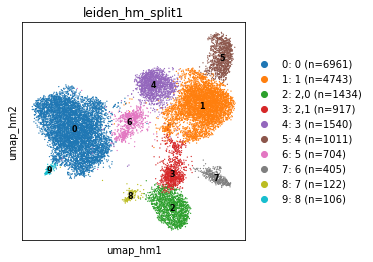

In [8]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_split1')

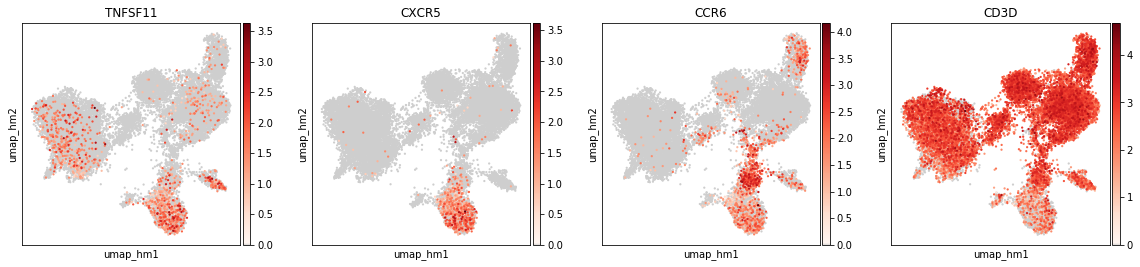

In [17]:
ss.lib.plot_scatter(ad, basis='umap_hm', color=['TNFSF11', 'CXCR5', 'CCR6', 'CD3D'], color_map=expr_cmap, size=20)

In [12]:
ad.obs['rachel_annot3'] = ss.lib.regroup(ad, groupby='leiden_hm_split1', regroups={
    'Lymphoid progenitor': '7',
    'ILC3': '2,0',
    'LTi': '2,1',
    'ILC2': '6',
    'CD4 T cell': '1',
    'CD8 T cell': '3',
    'Treg': '4',
    'NKT cell?': '5',
    'NK cell': '0',
    'NK cell 2': '8',
})

In [13]:
ad.obs.rachel_annot3.value_counts()

NK cell                6961
CD4 T cell             4743
CD8 T cell             1540
ILC3                   1434
Treg                   1011
LTi                     917
NKT cell?               704
ILC2                    405
Lymphoid progenitor     122
NK cell 2               106
Name: rachel_annot3, dtype: int64

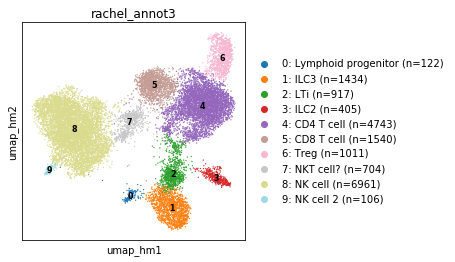

In [14]:
ss.lib.clear_colors(ad)
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='rachel_annot3', palette='tab20')

In [15]:
ss.lib.clear_colors(ad)

In [16]:
ad.write('fetal_skin.lymphoid_T_NK.doublet_removed_processed.20200403.h5ad', compression='lzf')

In [111]:
ad = sc.read('fetal_skin.lymphoid_T_NK.doublet_removed_processed.20200403.h5ad')

Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].


In [112]:
ad1 = ad[~ad.obs.rachel_annot3.isin(['CD4 T cell', 'CD8 T cell', 'Treg', 'NKT cell?']), :].copy()

In [113]:
ss.lib.simple_default_pipeline(ad1, batch='sanger_id', post_pca_only=True)

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda/envs/scrna/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


AnnData object with n_obs × n_vars = 9945 × 20535 
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'annot', 'hierarchy1', 'rachel_annot1', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_hm_r0_1', 'leiden_hm_r0_2', 'leiden_hm_r0_3', 'leiden_hm_r0_4', 'leiden_hm_r0_5', 'leiden_bk_r0_1', 'leiden_bk_r0_2', 'leiden_bk_r0_3', 'leiden_bk_r0_4', 'leiden_bk_r0_5', 'leiden_hm_r0_4_split', 'rachel_annot2', 'leiden_hm_split1', 'rachel_annot3', 'leiden_hm_r0_7', 'leiden_hm_r0_9'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'hvg_full'
    uns: 'leiden', 'neighbors_bk', 'neighbors_hm', 'pca', 'neighbors'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm', 'X_umap_bk'
  

In [121]:
ss.lib.run_phate(ad1, use_rep='X_pca_hm', key_added='hm', t=50)

Calculating PHATE...
  Running PHATE on 9945 cells and 50 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 7.14 seconds.
    Calculating affinities...
    Calculated affinities in 0.18 seconds.
  Calculated graph and diffusion operator in 7.33 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.91 seconds.
    Calculating KMeans...
    Calculated KMeans in 20.76 seconds.
  Calculated landmark operator in 23.07 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.58 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.84 seconds.
Calculated PHATE in 39.83 seconds.


In [122]:
ad1

AnnData object with n_obs × n_vars = 9945 × 20535 
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'annot', 'hierarchy1', 'rachel_annot1', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_hm_r0_1', 'leiden_hm_r0_2', 'leiden_hm_r0_3', 'leiden_hm_r0_4', 'leiden_hm_r0_5', 'leiden_bk_r0_1', 'leiden_bk_r0_2', 'leiden_bk_r0_3', 'leiden_bk_r0_4', 'leiden_bk_r0_5', 'leiden_hm_r0_4_split', 'rachel_annot2', 'leiden_hm_split1', 'rachel_annot3', 'leiden_hm_r0_7', 'leiden_hm_r0_9'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'hvg_full'
    uns: 'leiden', 'neighbors_bk', 'neighbors_hm', 'pca', 'neighbors'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm', 'X_umap_bk', '

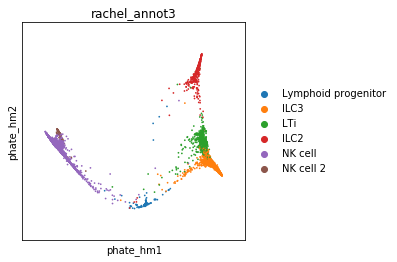

In [123]:
ss.lib.set_figsize((4,4))
ss.lib.plot_scatter(ad1, basis='phate_hm', color='rachel_annot3')

In [148]:
ss.lib.leiden(ad1, use_graph='neighbors_hm', key_added='hm', resolution=[0.4])

['leiden_hm_r0_4']

In [149]:
ss.lib.paga(ad1, use_graph='neighbors_hm', groups='leiden_hm_r0_4', key_added='hm')

/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):


AnnData object with n_obs × n_vars = 9945 × 20535 
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'annot', 'hierarchy1', 'rachel_annot1', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_hm_r0_1', 'leiden_hm_r0_2', 'leiden_hm_r0_3', 'leiden_hm_r0_4', 'leiden_hm_r0_5', 'leiden_bk_r0_1', 'leiden_bk_r0_2', 'leiden_bk_r0_3', 'leiden_bk_r0_4', 'leiden_bk_r0_5', 'leiden_hm_r0_4_split', 'rachel_annot2', 'leiden_hm_split1', 'rachel_annot3', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'leiden_hm_r1_0', 'leiden_hm_r3_0'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'hvg_full'
    uns: 'leiden', 'neighbors_bk', 'neighbors_hm', 'pca', 'neighbors', 'rachel_annot3_colors

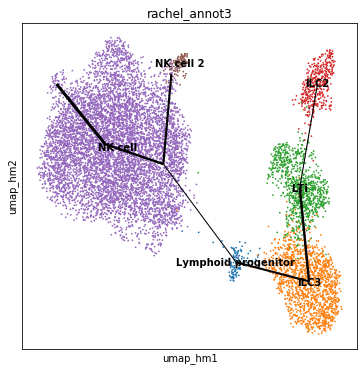

In [152]:
ss.lib.set_figsize((6,6))
ss.lib.plot_paga(ad1, use_key='paga_hm', basis='umap_hm', color='rachel_annot3', solid_edges='connectivities_tree', edge_width_scale=1)

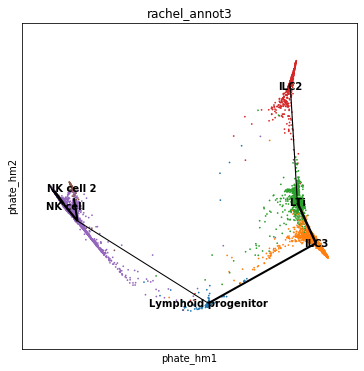

In [153]:
ss.lib.set_figsize((6,6))
ss.lib.plot_paga(ad1, use_key='paga_hm', basis='phate_hm', color='rachel_annot3', solid_edges='connectivities_tree', edge_width_scale=1)